In [26]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# creating sets of longitude and latitudes
lats = np.random.uniform(-90.000,90.000,size = 7000)
lngs = np.random.uniform(-180.000,1800.000,size = 7000)
lats_lngs = zip(lats,lngs)
lats_lngs

In [28]:
#adding coordinates to a list
coordinates = list(lats_lngs)

In [29]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

555

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd756d4665239c2aefa029228c386a37


In [33]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [37]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 6 of Set 12 | ilulissat
Processing Record 7 of Set 12 | asau
Processing Record 8 of Set 12 | beringovskiy
Processing Record 9 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 10 of Set 12 | san quintin
Processing Record 11 of Set 12 | bluff
Processing Record 12 of Set 12 | lavrentiya
Processing Record 13 of Set 12 | leningradskiy
Processing Record 14 of Set 12 | chandauli
Processing Record 15 of Set 12 | dunedin
Processing Record 16 of Set 12 | tolaga bay
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | hermanus
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | rikitea
Processing Record 21 of Set 12 | gimli
Processing Record 22 of Set 12 | beruwala
Processing Record 23 of Set 12 | nicoya
Processing Record 24 of Set 12 | chuy
Processing Record 25 of Set 12 | amderma
City not found. Skipping...
Processing Record 26 of Set 12 | cape town
Processing Record 27 of Set 12 | albion
Processing 

Processing Record 32 of Set 15 | okhotsk
Processing Record 33 of Set 15 | shingu
Processing Record 34 of Set 15 | eureka
Processing Record 35 of Set 15 | labytnangi
Processing Record 36 of Set 15 | samarai
Processing Record 37 of Set 15 | labuan
Processing Record 38 of Set 15 | ust-kamchatsk
City not found. Skipping...
Processing Record 39 of Set 15 | rosarito
Processing Record 40 of Set 15 | husavik
Processing Record 41 of Set 15 | beni mazar
Processing Record 42 of Set 15 | ndele
Processing Record 43 of Set 15 | nanortalik
Processing Record 44 of Set 15 | flinders
Processing Record 45 of Set 15 | talcahuano
Processing Record 46 of Set 15 | bethel
Processing Record 47 of Set 15 | upernavik
Processing Record 48 of Set 15 | chokurdakh
Processing Record 49 of Set 15 | scarborough
Processing Record 50 of Set 15 | tigre
Processing Record 1 of Set 16 | paita
Processing Record 2 of Set 16 | faya
Processing Record 3 of Set 16 | anadyr
Processing Record 4 of Set 16 | catuday
Processing Record 

Processing Record 18 of Set 19 | novyy urengoy
Processing Record 19 of Set 19 | adwa
Processing Record 20 of Set 19 | zlutice
Processing Record 21 of Set 19 | dhidhdhoo
Processing Record 22 of Set 19 | port hardy
Processing Record 23 of Set 19 | zmeinogorsk
Processing Record 24 of Set 19 | broome
Processing Record 25 of Set 19 | svetlaya
Processing Record 26 of Set 19 | walvis bay
Processing Record 27 of Set 19 | williston
Processing Record 28 of Set 19 | rio gallegos
Processing Record 29 of Set 19 | kathmandu
Processing Record 30 of Set 19 | vrangel
Processing Record 31 of Set 19 | swan hill
Processing Record 32 of Set 19 | clyde river
Processing Record 33 of Set 19 | flin flon
Processing Record 34 of Set 19 | bani
Processing Record 35 of Set 19 | umm ruwabah
City not found. Skipping...
Processing Record 36 of Set 19 | les cayes
Processing Record 37 of Set 19 | taoudenni
Processing Record 38 of Set 19 | kruisfontein
Processing Record 39 of Set 19 | ust-nera
Processing Record 40 of Set

Processing Record 50 of Set 22 | san ramon
Processing Record 1 of Set 23 | tateyama
Processing Record 2 of Set 23 | halalo
City not found. Skipping...
Processing Record 3 of Set 23 | chekmagush
Processing Record 4 of Set 23 | blagoyevo
Processing Record 5 of Set 23 | zelenogorsk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,3.20,72,90,5.75,GL,2021-01-30 21:23:04
1,Asau,46.4333,26.4000,44.60,61,0,6.91,RO,2021-01-30 21:23:04
2,Beringovskiy,63.0500,179.3167,6.40,95,100,14.47,RU,2021-01-30 21:23:04
3,San Quintin,30.4833,-115.9500,60.93,56,0,8.21,MX,2021-01-30 21:23:05
4,Bluff,-46.6000,168.3333,53.01,81,99,5.88,NZ,2021-01-30 21:23:05
5,Lavrentiya,65.5833,-171.0000,-18.80,83,0,6.38,RU,2021-01-30 21:23:05
6,Leningradskiy,69.3833,178.4167,-27.99,82,0,2.46,RU,2021-01-30 21:23:05
7,Chandauli,25.2667,83.2667,50.00,81,0,2.30,IN,2021-01-30 21:23:05
8,Dunedin,-45.8742,170.5036,57.99,70,16,18.01,NZ,2021-01-30 21:23:06
9,Tolaga Bay,-38.3667,178.3000,59.58,81,94,9.80,NZ,2021-01-30 21:23:06


In [39]:
new_column_order = ["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [41]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2021-01-30 21:23:04,69.2167,-51.1000,3.20,72,90,5.75
1,Asau,RO,2021-01-30 21:23:04,46.4333,26.4000,44.60,61,0,6.91
2,Beringovskiy,RU,2021-01-30 21:23:04,63.0500,179.3167,6.40,95,100,14.47
3,San Quintin,MX,2021-01-30 21:23:05,30.4833,-115.9500,60.93,56,0,8.21
4,Bluff,NZ,2021-01-30 21:23:05,-46.6000,168.3333,53.01,81,99,5.88


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

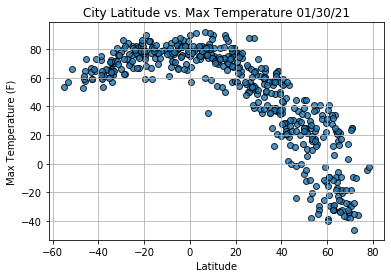

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

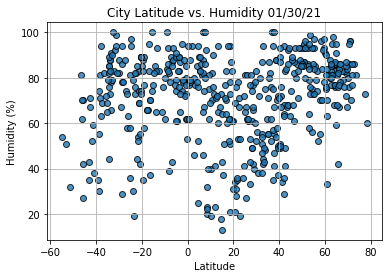

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

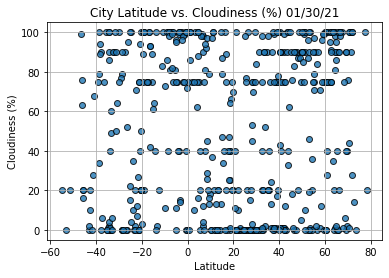

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

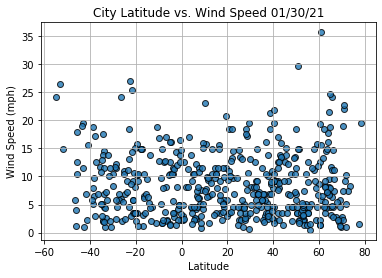

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [53]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>0)]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

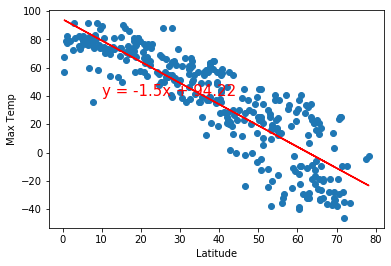

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

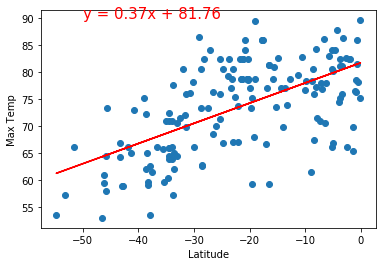

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

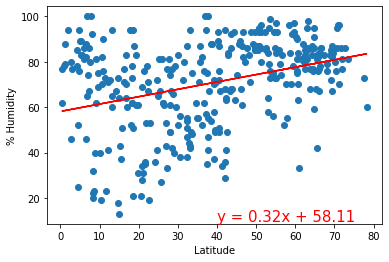

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

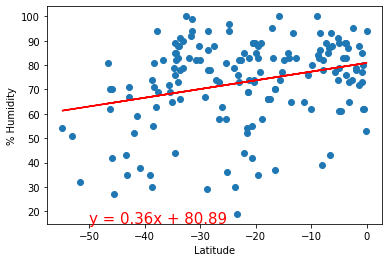

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

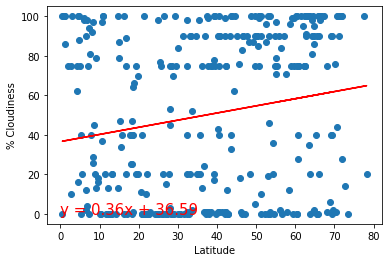

In [73]:
# Linear regression on the northern hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#calling the function
plot_linear_regression(x_values,y_values,"Linear regression on the norther Hemisphere \
                                        for the % Cloudiness","% Cloudiness",(0,0))

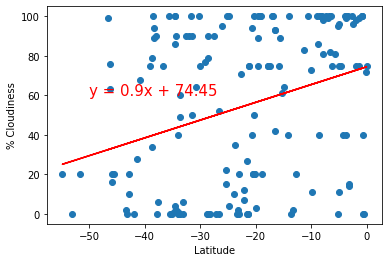

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

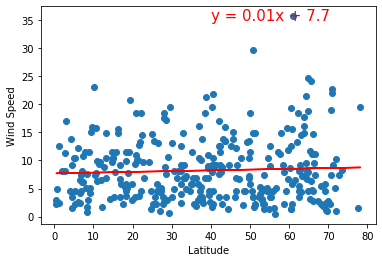

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(40,35))

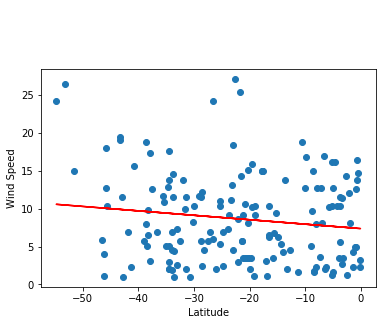

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for Wind Speed', 'Wind Speed',(-50,35))